In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv("Road_Accident_Data.csv")
data.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [3]:
# Información general del dataset
data.info()

# Resumen estadístico de las columnas numéricas
data.describe()

# Número de valores nulos por columna
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [4]:
 # Verificar duplicados en todo el dataset
duplicados = data.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")

Número de filas duplicadas: 1


In [5]:
# Eliminar duplicados
data = data.drop_duplicates()

# Verificar nuevamente duplicados
print(f"Número de filas después de eliminar duplicados: {data.duplicated().sum()}")

Número de filas después de eliminar duplicados: 0


In [6]:
data["Speed_limit"] = data["Speed_limit"].fillna(data["Speed_limit"].mean())

In [7]:
data["Number_of_Casualties"] = data["Number_of_Casualties"].fillna(data["Number_of_Casualties"].median())

In [8]:
data["Weather_Conditions"] = data["Weather_Conditions"].fillna(data["Weather_Conditions"].mode()[0])

In [9]:
data = data.dropna(subset=["Time"])

In [10]:
# Llenar valores nulos en columnas numéricas
numericas = ["Speed_limit", "Number_of_Casualties", "Number_of_Vehicles"]
for col in numericas:
    data[col] = data[col].fillna(data[col].median())

# Llenar valores nulos en columnas categóricas
categoricas = ["Road_Surface_Conditions", "Weather_Conditions", "Road_Type"]
for col in categoricas:
    data[col] = data[col].fillna(data[col].mode()[0])

In [11]:
# Verificar nuevamente valores nulos
print(data.isnull().sum())

# Verificar dimensiones del dataset
print(data.shape)

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302531
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions            0
Road_Type                          0
Speed_limit                        0
Time                               0
Urban_or_Rural_Area                0
Weather_Conditions                 0
Vehicle_Type                       0
dtype: int64
(307955, 21)


In [26]:
data = data.drop(columns=["Carriageway_Hazards"], errors="ignore")

C:\Users\Percy\AppData\Local\Temp\ipykernel_6512\1913041003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Accident_Severity", order=data["Accident_Severity"].value_counts().index, palette="viridis")


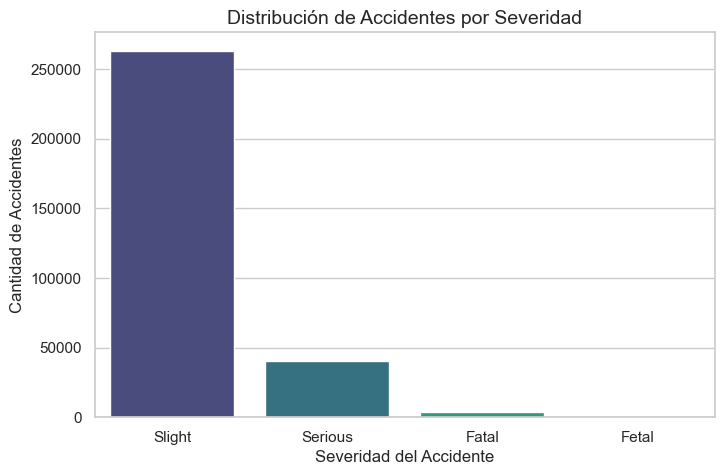

In [28]:
# Distribución de la severidad de los accidentes
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Accident_Severity", order=data["Accident_Severity"].value_counts().index, palette="viridis")
plt.title("Distribución de Accidentes por Severidad", fontsize=14)
plt.xlabel("Severidad del Accidente", fontsize=12)
plt.ylabel("Cantidad de Accidentes", fontsize=12)
plt.show()

Distribución de Accidentes por Severidad:
Los accidentes de menor severidad ("Slight") representan la mayoría de los casos.
Los accidentes "Serious" son significativamente menores.
Los accidentes "Fatal" son raros, pero deben ser prioridad en las medidas de prevención.

Insight:
Las políticas de prevención de accidentes deben centrarse en reducir los accidentes de menor severidad, ya que son los más comunes, pero sin ignorar los graves y fatales.

C:\Users\Percy\AppData\Local\Temp\ipykernel_6512\319681334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="Weather_Conditions", order=data["Weather_Conditions"].value_counts().index, palette="coolwarm")


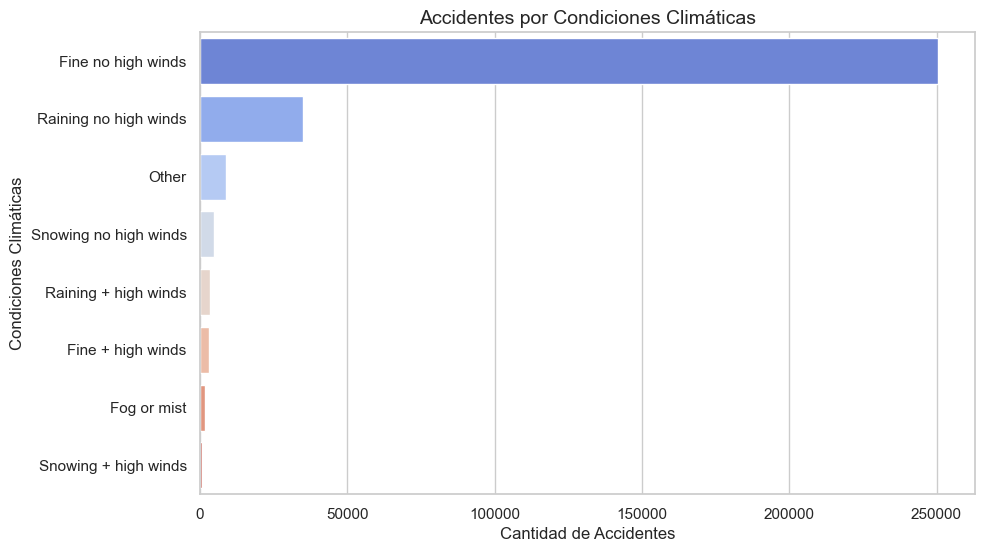

In [30]:
# Distribución por condiciones climáticas
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y="Weather_Conditions", order=data["Weather_Conditions"].value_counts().index, palette="coolwarm")
plt.title("Accidentes por Condiciones Climáticas", fontsize=14)
plt.xlabel("Cantidad de Accidentes", fontsize=12)
plt.ylabel("Condiciones Climáticas", fontsize=12)
plt.show()

La mayoría de los accidentes ocurren en condiciones climáticas "Fine no high winds" (buen clima sin vientos fuertes).
Las condiciones climáticas más peligrosas parecen incluir lluvias y niebla, aunque son menos comunes.

Insight:
Aunque los accidentes son más frecuentes en buen clima, las campañas de concienciación deberían destacar la importancia de precaución en lluvias, niebla y condiciones adversas.

C:\Users\Percy\AppData\Local\Temp\ipykernel_6512\728563546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Day_of_Week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="pastel")


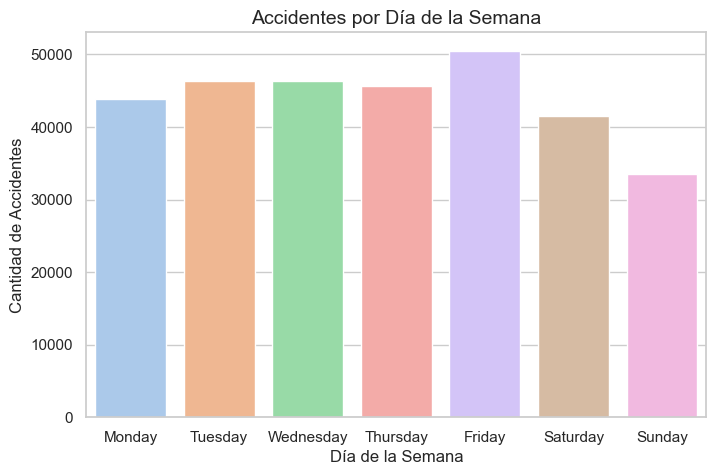

In [32]:
# Accidentes por día de la semana
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Day_of_Week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="pastel")
plt.title("Accidentes por Día de la Semana", fontsize=14)
plt.xlabel("Día de la Semana", fontsize=12)
plt.ylabel("Cantidad de Accidentes", fontsize=12)
plt.show()

Los viernes tienen la mayor cantidad de accidentes, mientras que los domingos tienen la menor cantidad.

Insight:
Esto podría estar relacionado con un aumento del tráfico y actividades sociales los viernes. Los esfuerzos para gestionar el tráfico y la seguridad vial podrían ser más efectivos si se enfocan en este día.

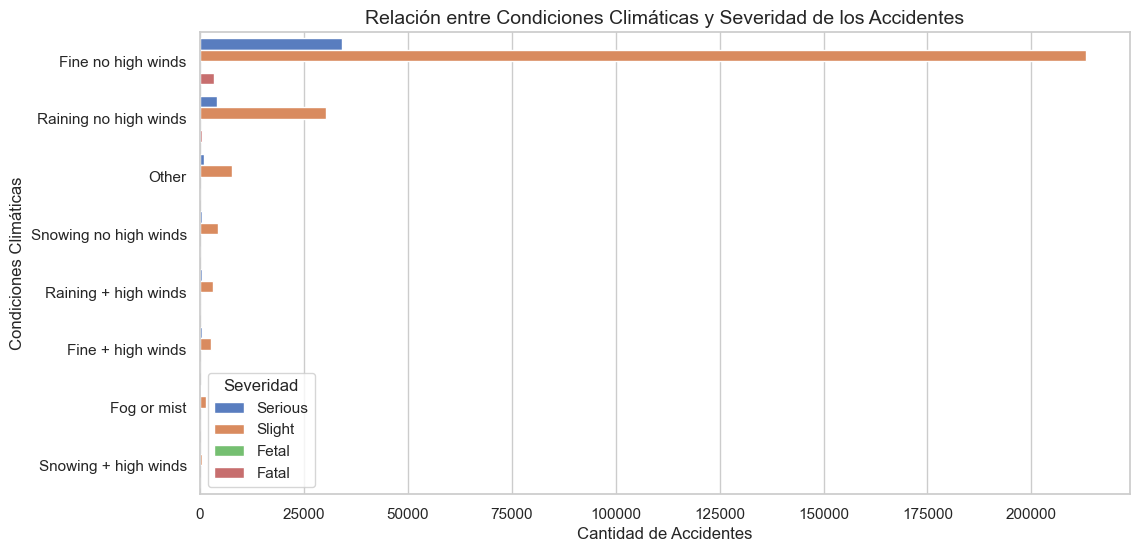

In [34]:
# Relación entre condiciones climáticas y severidad
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y="Weather_Conditions", hue="Accident_Severity", palette="muted", order=data["Weather_Conditions"].value_counts().index)
plt.title("Relación entre Condiciones Climáticas y Severidad de los Accidentes", fontsize=14)
plt.xlabel("Cantidad de Accidentes", fontsize=12)
plt.ylabel("Condiciones Climáticas", fontsize=12)
plt.legend(title="Severidad")
plt.show()

En todas las condiciones climáticas, los accidentes "Slight" predominan.
Condiciones como lluvia ("Raining no high winds") tienen un mayor número de accidentes "Serious" comparado con otras condiciones.

Insight:
Las campañas de seguridad vial deben enfatizar el uso de luces, reducción de velocidad y precaución adicional en lluvia para prevenir accidentes graves.

C:\Users\Percy\AppData\Local\Temp\ipykernel_6512\1338893623.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Time"] = pd.to_datetime(data["Time"], errors="coerce").dt.hour


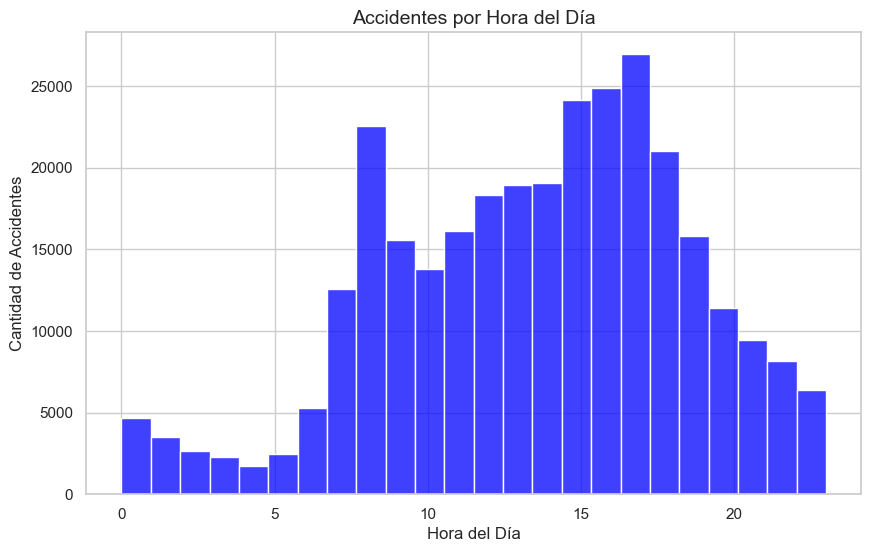

In [36]:
# Convertir a formato datetime y extraer la hora
data["Time"] = pd.to_datetime(data["Time"], errors="coerce").dt.hour

# Gráfico de accidentes por hora
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Time", bins=24, kde=False, color="blue")
plt.title("Accidentes por Hora del Día", fontsize=14)
plt.xlabel("Hora del Día", fontsize=12)
plt.ylabel("Cantidad de Accidentes", fontsize=12)
plt.show()

Los accidentes alcanzan un pico en las horas de la mañana (8-10 AM) y por la tarde (4-6 PM), coincidiendo con las horas de mayor tráfico (inicio y fin de la jornada laboral).

Insight:
Las políticas de seguridad vial, como patrullas y campañas educativas, deben reforzarse durante estas horas pico para prevenir accidentes.

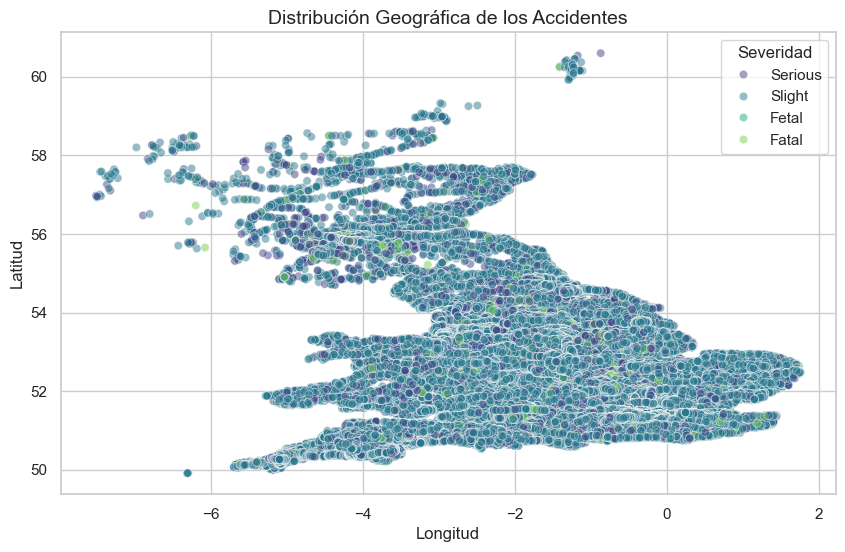

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Longitude", y="Latitude", hue="Accident_Severity", palette="viridis", alpha=0.5)
plt.title("Distribución Geográfica de los Accidentes", fontsize=14)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
plt.legend(title="Severidad")
plt.show()

Los accidentes están concentrados en áreas específicas, lo que sugiere que ciertos lugares son puntos críticos.
Insight:

Se podrían implementar medidas específicas en las áreas más afectadas, como cámaras de velocidad, señalización adicional o mejora de las condiciones de las carreteras.


C:\Users\Percy\AppData\Local\Temp\ipykernel_6512\1414626251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Urban_or_Rural_Area", palette="Set2")


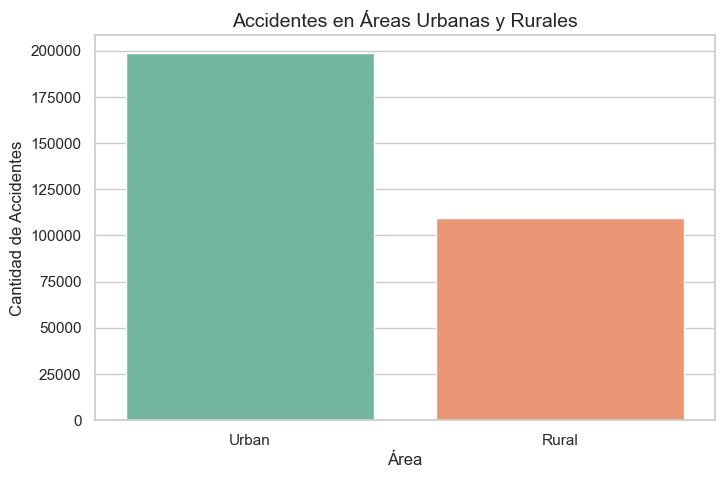

In [39]:
# Accidentes por área urbana/rural
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Urban_or_Rural_Area", palette="Set2")
plt.title("Accidentes en Áreas Urbanas y Rurales", fontsize=14)
plt.xlabel("Área", fontsize=12)
plt.ylabel("Cantidad de Accidentes", fontsize=12)
plt.show()

La mayoría de los accidentes ocurren en áreas urbanas.

Insight:
Esto puede deberse al mayor volumen de tráfico en zonas urbanas. Las campañas de prevención y mejoras en la infraestructura vial deben priorizar estas zonas.

RECOMENDACIONES FINALES:
Seguridad vial en horas pico: Implementar estrategias como mejor sincronización de semáforos y campañas educativas para reducir accidentes en las horas pico.
Campañas específicas para el viernes: Sensibilizar a los conductores sobre los riesgos y fomentar una conducción más responsable los viernes.
Mejoras en zonas urbanas críticas: Identificar las áreas urbanas con mayor concentración de accidentes y realizar intervenciones específicas.
Precaución en climas adversos: Incentivar el uso de luces, disminuir velocidad y mantener mayor distancia en condiciones climáticas adversas.